In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from skimage import io

In [2]:
def addzeros(img):
    h = img.shape[0]
    w = img.shape[1]
    r1=0
    r2=1
    r3 = h-1
    r4 = h-2
    c1= 0
    c2 = 1
    c3 = w-1
    c4 = w-2
    for i in range(0,w):
        img[r1][i]=0
        img[r2][i]=0
        img[r3][i]=0
        img[r4][i]=0
    for j in range(0,h):
        img[j][c1]=0
        img[j][c2]=0
        img[j][c3]=0
        img[j][c4]=0
    return img

In [3]:
A1 = io.imread('pic1grey300.jpg')
(M,N) = A1.shape
A = addzeros(A1)

In [5]:
f1 = pd.read_csv('filter1.csv', sep=',', header=None)
f2 = pd.read_csv('filter2.csv', sep=',', header=None)
filter1 = f1.to_numpy()
filter2 = f2.to_numpy()
print(filter1)
print(filter2)

[[ 0  0 -1  0  0]
 [ 0 -1 -2 -1  0]
 [-1 -2 16 -2 -1]
 [ 0 -1 -2 -1  0]
 [ 0  0 -1  0  0]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [6]:
def convolution(g,f):
    h = np.zeros((M, N), dtype=np.float32)
    for i in range(2, M - 2):
        for j in range(2, N - 2):
            for k in range(5):
                for l in range(5):
                    h[i, j] += g[k][l] * f[i - (k - 2), j - (l - 2)]
                    
    return h

In [7]:
def rescale(h):
    r = np.zeros((M, N), dtype=np.uint8)
    hmin, hmax = float('inf'), float('-inf')
    for i in range(2, M - 2):
        for j in range(2, N - 2):
            hmin, hmax = min(hmin, h[i, j]), max(hmax, h[i, j])
    for i in range(2, M - 2):
        for j in range(2, N - 2):
            r[i, j] = (h[i, j] - hmin) * 255 / (hmax - hmin)
    return r

In [8]:
h1 = np.zeros((M, N), dtype=np.float32)
h2 = np.zeros((M, N), dtype=np.float32)
h1 = convolution(filter1,A)
r1 = rescale(h1)
h2 = convolution(filter2,A)
r2 = rescale(h2)

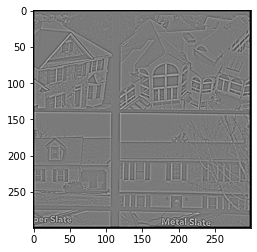

-1

In [9]:
plt.imshow(r1,cmap='gray')
plt.show()
cv2.imshow('filter 1 image',r1)
cv2.imwrite('filter1image.png',r1)
cv2.waitKey(0)

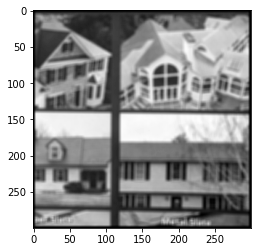

-1

In [10]:
plt.imshow(r2,cmap='gray')
plt.show()
cv2.imshow('filter 2 image',r2)
cv2.imwrite('filter2image.png',r2)
cv2.waitKey(0)